In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]


########### Updated list using the color-LogWimx correaltion

W1_maglim = I_maglim

In [3]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

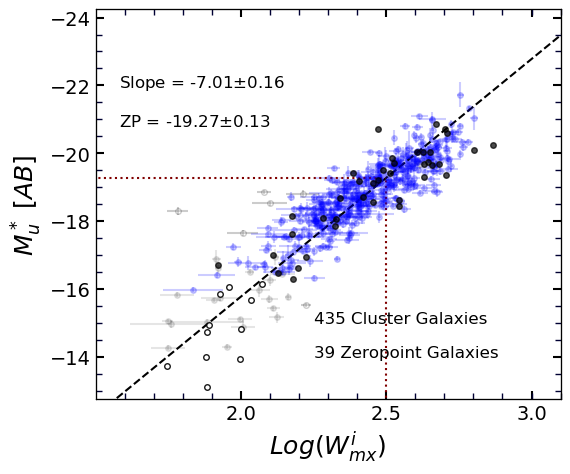

In [4]:
TF_all = {}

fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='u', makePlot=True)
TF_all['u'] = S_ZP

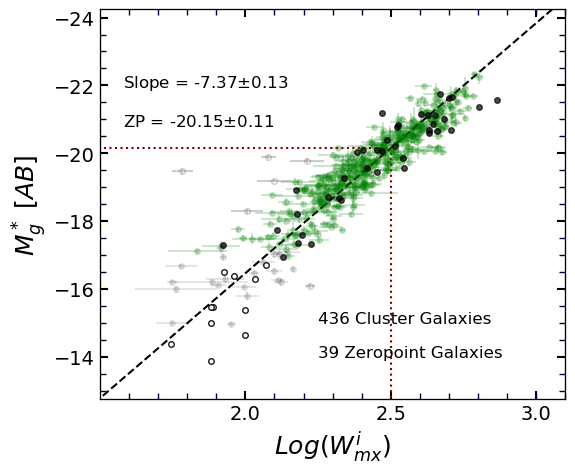

In [5]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='g', makePlot=True)
TF_all['g'] = S_ZP

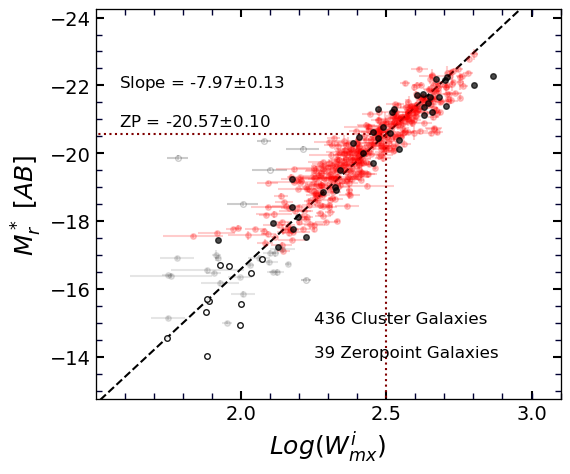

In [6]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='r', makePlot=True)
TF_all['r'] = S_ZP

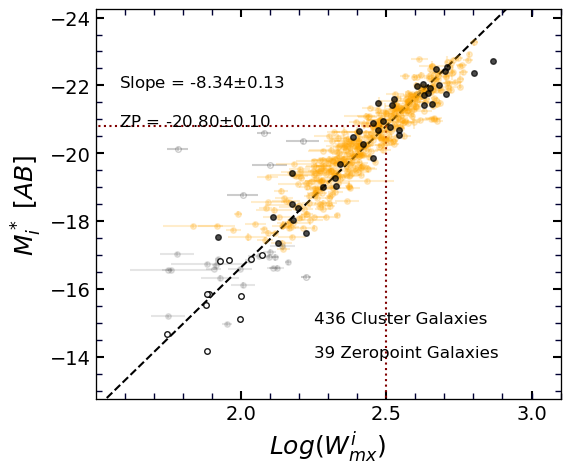

In [7]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='i', makePlot=True)
TF_all['i'] = S_ZP

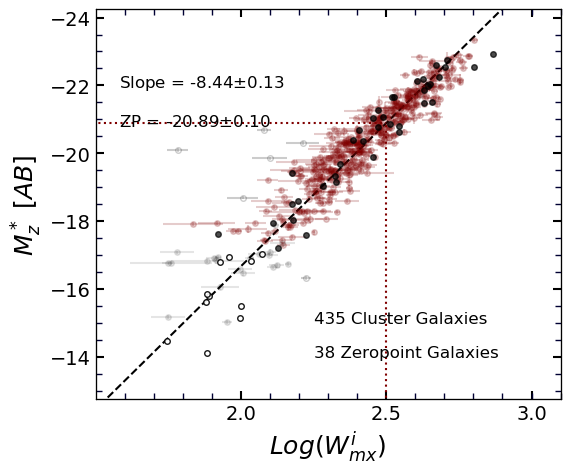

In [8]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='z', makePlot=True)
TF_all['z'] = S_ZP

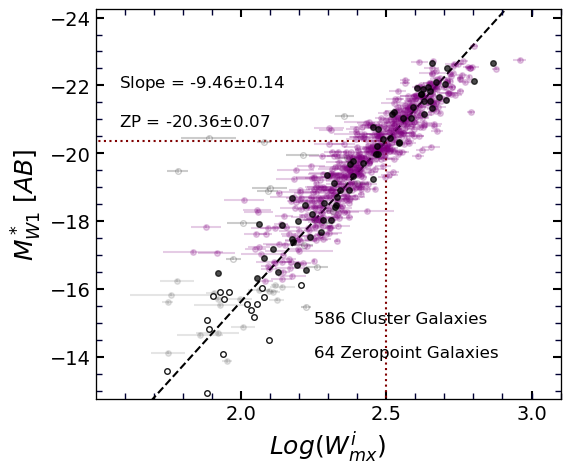

In [9]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='w1', makePlot=True)
TF_all['w1'] = S_ZP

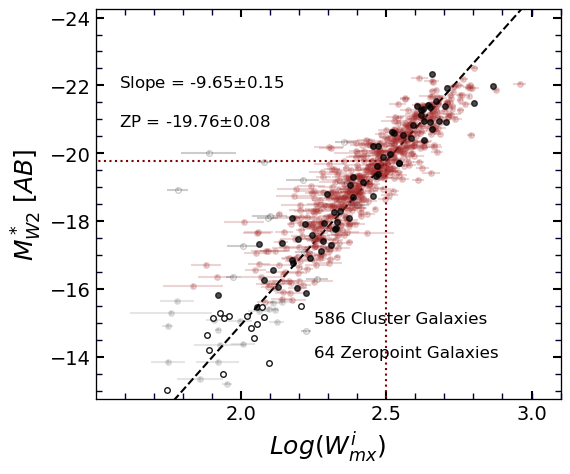

In [10]:
fig, ax, Clusters, S_ZP = makeTF(table, pgcFaint=W1_maglim, calib_maglim=calib_maglim, band='w2', makePlot=True)
TF_all['w2'] = S_ZP

u
g
r
i
z
w1
w2


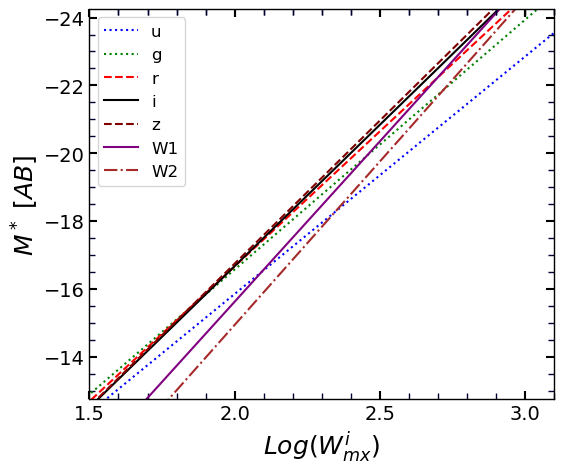

In [11]:
dye = {"u":"blue","g":"green","r":"red","i":"black","z":"maroon","w1":"purple", 'w2': "brown"}
ls = {"u":":","g":":","r":"--","i":"-","z":"--","w1":"-", 'w2': "-."}
fig, ax = makeFig(band='', xLim = (1.5,3.1), yLim = (-12.75,-24.25), MAGabs=True)


for band in ['u', 'g', 'r', 'i', 'z', 'w1', 'w2']:
    
    print band
    C_zp = 0
    e_czp = 0
    if band == 'u':
        C_zp = -0.08
        e_czp = 0.30
    if band == 'g':
        C_zp = -0.11  
        e_czp = 0.18
    if band == 'r':
        C_zp = -0.08
        e_czp = 0.13
    if band == 'i':
        C_zp = -0.04
        e_czp = 0.10
    if band == 'z':
        C_zp = -0.08 
        e_czp = 0.11
    
    
    
    slope = TF_all[band][0]
    zp    = TF_all[band][2]+C_zp
    color = dye[band]
    x = np.linspace(-5,5,50)
    y = slope*(x-2.5)+zp
    myLabel = band
    if band in ['w1','w2']:
        myLabel = band.upper()
    ax.plot(x,y, linestyle=ls[band], color=color, label=myLabel)

ax.legend(prop={'size': 12}, loc=2)


ax.set_xticks(np.arange(1.5,3.5, step=0.5))

     

if True:
    x_ax = ax.twiny()
    x_ax.set_xlim(1.5,3.1)
    x_ax.set_xticklabels([])
    x_ax.minorticks_on()
    x_ax.tick_params(which='major', length=6, width=1.5, direction='in')
    x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')     
    x_ax.set_xticks(np.arange(1.5, 3.5, step=0.5))

In [12]:
for band in ['u', 'g', 'r', 'i', 'z', 'w1', 'w2']:
    print band, TF_all[band]

u [-7.006659053688532 0.16452455210110983 -19.27466243638522
 array([0.12616734])]
g [-7.370193862066084 0.13139457851685146 -20.1485672749239
 array([0.107156])]
r [-7.968543668578382 0.12885254052496617 -20.569792097097327
 array([0.0991705])]
i [-8.341425019471638 0.13141987572725408 -20.803868533405293
 array([0.09906055])]
z [-8.441918244025926 0.13025245359887555 -20.887515735240193
 array([0.09749174])]
w1 [-9.463390322625607 0.14206814955271838 -20.355824064489916
 array([0.07369251])]
w2 [-9.645406994713992 0.1504819967093834 -19.762325822618166
 array([0.08074022])]
